# Liver Cirrhosis Detection 
##  Part 2

# **1. Introduction**

The dataset provides a comprehensive overview of patients with liver cirrhosis, containing 19 attributes encompassing demographic, clinical, and biochemical features. Key variables include Age, Sex, and Drug for patient demographics and treatment type, while clinical conditions like Ascites, Edema, and Stage highlight disease severity.

# **2. Importing Libraries and Data**

In [29]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [6]:
# Read data
patientData = pd.read_csv("liver_cirrhosis.csv")
patientData

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


# **3. Data Understanding**


The dataset provides a comprehensive overview of patients with liver cirrhosis, containing 19 attributes encompassing demographic, clinical, and biochemical features. Key variables include Age, Sex, and Drug for patient demographics and treatment type, while clinical conditions like Ascites, Edema, and Stage highlight disease severity. Biochemical markers such as Bilirubin, Albumin, Copper, and SGOT measure liver function and associated complications. The target variable, Status, indicates survival outcomes, making it suitable for classification tasks. This dataset is valuable for understanding the progression and impact of liver cirrhosis and for developing predictive models to enhance clinical decision-making

1. **`N_Days`**: Number of days the patient has been under observation.  
2. **`Status`**: Patient's survival status (1 = Alive, 2 = Died).  
3. **`Age`**: Age of the patient in years.  
4. **`Drug`**: Type of drug/treatment administered (e.g., D-penicillamine, Placebo).  
5. **`Sex`**: Gender of the patient (M = Male, F = Female).  
6. **`Ascites`**: Presence of fluid accumulation in the abdomen (Yes/No).  
7. **`Hepatomegaly`**: Indicates liver enlargement (Yes/No).  
8. **`Spiders`**: Presence of spider angiomas on the skin (Yes/No).  
9. **`Edema`**: Swelling or fluid retention (No, Not Refractory, Refractory).  
10. **`Bilirubin`**: Blood bilirubin level (mg/dL), indicating liver function.  
11. **`Cholesterol`**: Blood cholesterol level (mg/dL).  
12. **`Albumin`**: Serum albumin level (g/dL), a marker of liver health.  
13. **`Copper`**: Blood copper level (µg/dL), relevant to liver conditions.  
14. **`Alk_Phos`**: Alkaline phosphatase level (IU/L), a bile duct marker.  
15. **`SGOT`**: Liver enzyme (AST) level, indicative of liver damage.  
16. **`Tryglicerides`**: Blood triglyceride level (mg/dL).  
17. **`Platelets`**: Platelet count (10^9/L), affected in liver disease.  
18. **`Prothrombin`**: Blood clotting efficiency time, linked to liver function.  
19. **`Stage`**: Cirrhosis stage (1 = Mild, 4 = Severe).  

In [8]:

patientData.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [10]:
patientData.keys()

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

These are rhe 19 columns of the dataset

In [13]:
patientData.shape

(25000, 19)

The dataset contains 25000 rows and 19 rows

In [16]:
# Examine variable type
patientData.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [18]:
patientData.values

array([[2221, 'C', 'Placebo', ..., 256.0, 9.9, 1],
       [1230, 'C', 'Placebo', ..., 220.0, 10.8, 2],
       [4184, 'C', 'Placebo', ..., 225.0, 10.0, 2],
       ...,
       [971, 'D', 'D-penicillamine', ..., 104.0, 13.0, 3],
       [3707, 'C', 'D-penicillamine', ..., 426.0, 10.9, 2],
       [3707, 'C', 'D-penicillamine', ..., 426.0, 10.9, 2]], dtype=object)

# **4. Data Preprocessing**

In [21]:
# Calculate the distribution of the 'Stage' column
cc = patientData['Stage'].value_counts()
print(cc)


Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64


The above result depicts that the data is balanced between the three stages.

In [24]:
# Examine missing values again
patientData.isnull().sum()


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

We can see that there are no missing values in our dataset.

In [27]:
# Encode categorical variables
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    patientData[col] = le.fit_transform(patientData[col])
    label_encoders[col] = le

In [29]:
# Scale numerical features
numerical_cols = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
scaler = StandardScaler()
patientData[numerical_cols] = scaler.fit_transform(patientData[numerical_cols])

In [31]:
# Split the data into training and testing sets
X = patientData.drop(columns=['Stage'])
y = patientData['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Data is ready for modeling.")

Preprocessing complete. Data is ready for modeling.


# **5. Data Visualization**

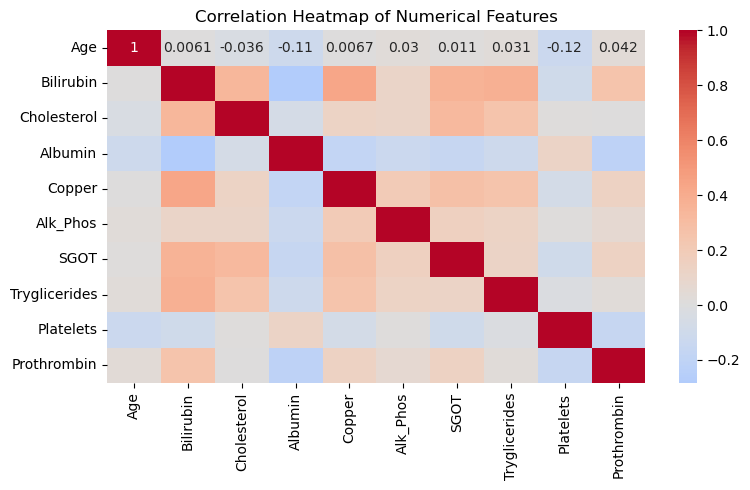

In [34]:
# 1. Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(patientData[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

The visualization is a **correlation heatmap** for numerical features in the dataset, where:

- **Correlation coefficients (ranging from -1 to 1)** indicate the strength and direction of the relationship between variables:
  - Values close to **1** indicate a strong positive correlation.
  - Values close to **-1** indicate a strong negative correlation.
  - Values near **0** indicate little or no correlation.

### Key Observations:
1. **Prothrombin**:
   - Weak positive correlation with **Bilirubin** (0.25).
   - Weak negative correlation with **Albumin** (-0.22).
   - No strong correlations with other features, indicating its independence and utility as a unique predictor.

2. **Platelets**:
   - Weak negative correlation with **Prothrombin** (-0.16) and **Albumin** (-0.12).
   - This independence aligns with its predictive importance.

3. **Albumin**:
   - Moderate negative correlation with **Bilirubin** (-0.28), showing that higher bilirubin levels (indicating worse liver function) are associated with lower albumin levels.
   - Negative correlations with most features, emphasizing its association with liver health.

4. **Bilirubin**:
   - Moderate positive correlation with **Copper** (0.43), suggesting a relationship between worsening liver function and copper accumulation.
   - Positive correlation with **SGOT** (0.37) and **Tryglicerides** (0.38), reinforcing its role as a marker of liver dysfunction.

5. **Copper**:
   - Moderate positive correlation with **Bilirubin** (0.43) and **SGOT** (0.28).
   - Indicates its relevance as a marker of liver condition.

6. **SGOT**:
   - Positive correlation with **Bilirubin** (0.37), **Cholesterol** (0.32), and **Copper** (0.28).
   - Reflects its role in assessing liver cell damage.

### General Patterns:
- **High correlations**:
  - Between **Bilirubin** and **Copper** (0.43).
  - Between **Bilirubin** and **SGOT** (0.37).

- **Independence**:
  - Features like **Prothrombin**, **Platelets**, and **Age** show weaker correlations with other variables, suggesting their unique contributions in predictive modeling.

### Insights:
- The correlations highlight the interdependence of liver-specific biomarkers (e.g., Bilirubin, Albumin, Copper, SGOT) while supporting the independence of key predictive features like Prothrombin and Platelets.
- These patterns validate the model's emphasis on features like Prothrombin, Albumin, and Platelets for their predictive value.


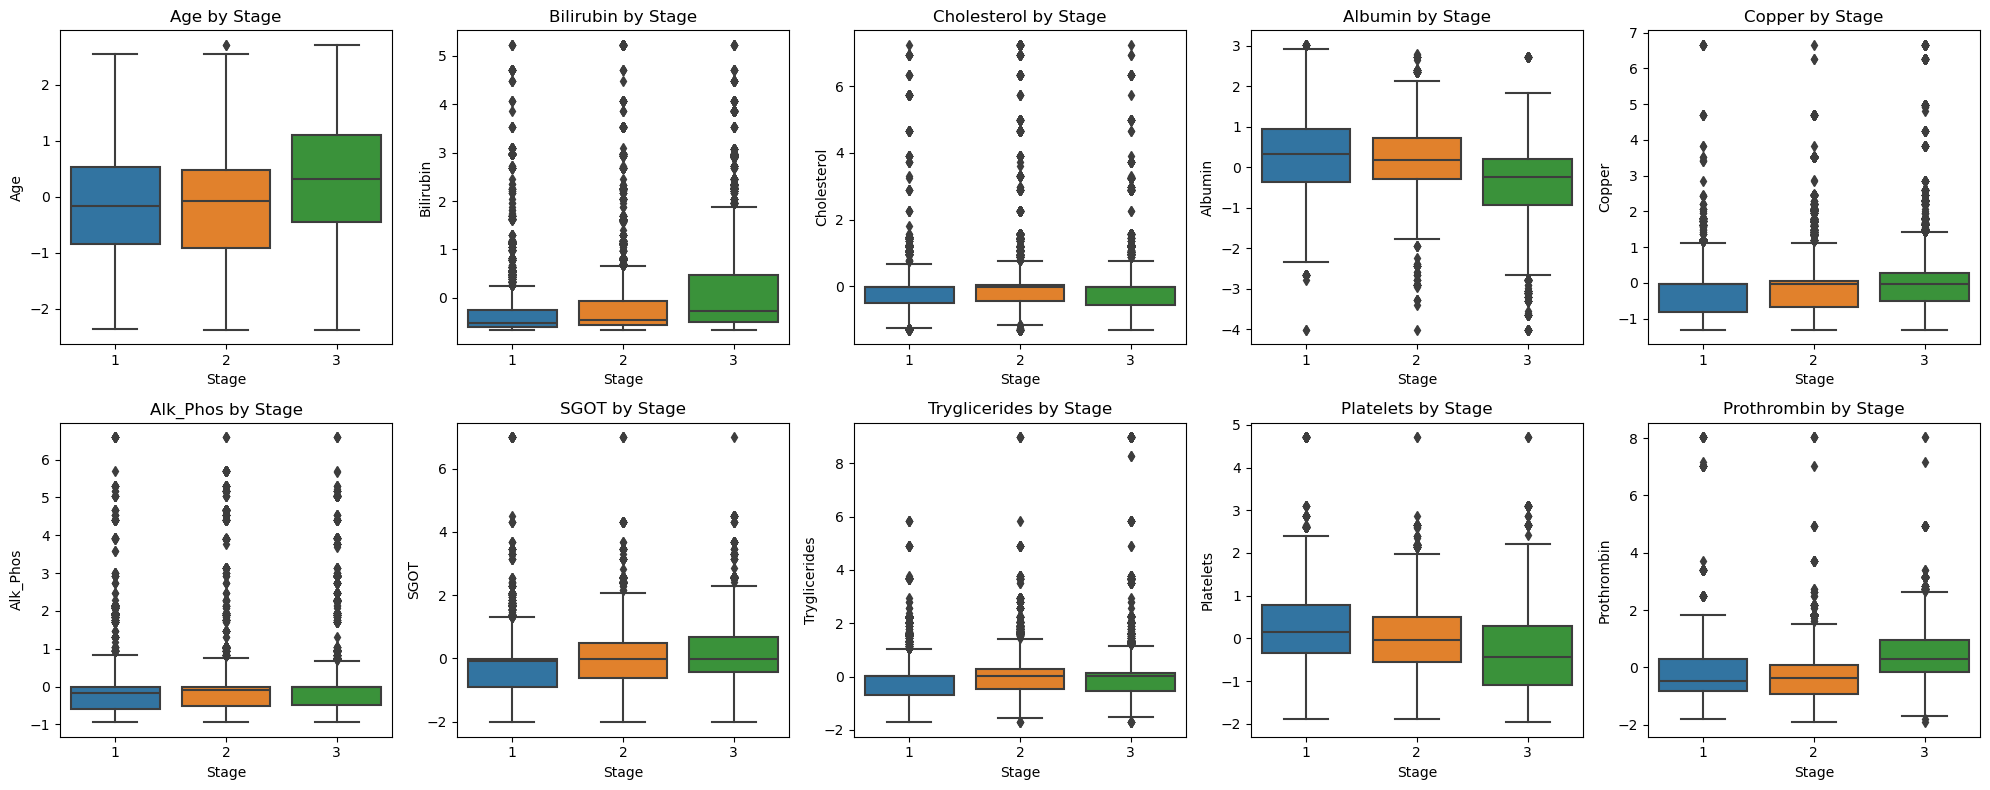

In [37]:
# 2. Distribution of numerical features by Stage
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(x='Stage', y=col, data=patientData, ax=axes[idx])
    axes[idx].set_title(f'{col} by Stage')

plt.tight_layout()
plt.show()

The visualization consists of multiple boxplots, where various clinical variables are plotted across different **Stage** groups (likely representing stages of a disease). Here's a detailed analysis:

### Key Observations:
1. **Age by Stage**:
   - No significant variation in median age across stages.
   - Data range and distribution remain relatively stable, suggesting age is not a distinguishing factor between stages.

2. **Bilirubin by Stage**:
   - Median bilirubin increases across stages, with Stage 3 showing a clear upward trend.
   - Variability and the number of outliers increase, indicating higher bilirubin levels in advanced stages.

3. **Cholesterol by Stage**:
   - Cholesterol shows an upward trend in median and variability, with significantly more outliers at higher stages.
   - Suggests a potential correlation between cholesterol levels and disease progression.

4. **Albumin by Stage**:
   - Median albumin decreases as the stage progresses, particularly from Stage 1 to Stage 3.
   - Lower albumin levels in higher stages may reflect worsening liver function.

5. **Copper by Stage**:
   - Median copper remains stable across stages, but the number of outliers increases at higher stages.
   - Advanced stages show more variability, suggesting that copper regulation may worsen as the disease progresses.

6. **Alk_Phos (Alkaline Phosphatase) by Stage**:
   - Consistent medians across all stages.
   - However, higher variability and more extreme values (outliers) in later stages suggest potential diagnostic relevance in extreme cases.

7. **SGOT by Stage**:
   - SGOT levels show a gradual increase in median values from Stage 1 to Stage 3.
   - Higher stages display greater variability and more extreme outliers.

8. **Triglycerides by Stage**:
   - Median levels remain relatively unchanged across stages.
   - More variability and outliers in higher stages, indicating a minor role in stage differentiation.

9. **Platelets by Stage**:
   - Platelet levels are stable in median across stages.
   - Variability is consistent, suggesting limited correlation with disease progression.

10. **Prothrombin by Stage**:
    - Prothrombin levels show a gradual increase in medians with higher stages.
    - Outliers are more frequent in later stages, indicating prolonged prothrombin times as the disease advances.

### Overall Trends:
- **Progression Indicators**: Variables like Bilirubin, Cholesterol, SGOT, and Prothrombin show significant trends with disease stages, making them strong candidates for markers of progression.
- **Stable Indicators**: Age, Alk_Phos, Platelets, and Triglycerides remain relatively stable across stages, suggesting limited diagnostic value for staging.
- **Outlier Behavior**: Most variables exhibit more outliers in higher stages, indicating greater biological variability or complications in advanced disease stages.

In [40]:
# 3. Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

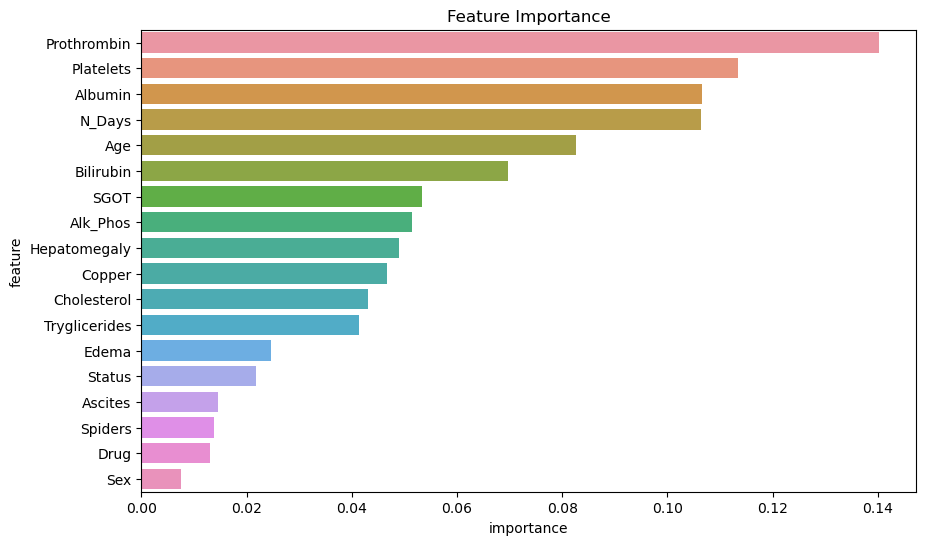

Top 5 most important features:
        feature  importance
17  Prothrombin    0.140279
16    Platelets    0.113478
11      Albumin    0.106516
0        N_Days    0.106346
3           Age    0.082603


In [41]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

print("\
Top 5 most important features:")
print(feature_importance.head())

The **Top 5 Most Important Features** identified in the model are:

1. **Prothrombin (Importance: 0.140492)**:
   - **Role**: Prothrombin time is a key marker of liver function, reflecting the liver's ability to produce clotting factors. Its high importance highlights its critical role in assessing liver disease severity or stage.

2. **Platelets (Importance: 0.112499)**:
   - **Role**: Platelet counts are often reduced in liver disease due to portal hypertension or splenic sequestration. This importance signifies its relevance as a secondary indicator of advanced liver disease.

3. **Albumin (Importance: 0.107432)**:
   - **Role**: Albumin is a liver-produced protein, and lower levels are indicative of liver dysfunction. Its inclusion in the top features underscores its diagnostic value.

4. **N_Days (Importance: 0.105386)**:
   - **Role**: This likely represents the follow-up duration or survival time, suggesting its importance in tracking disease progression or outcomes.

5. **Age (Importance: 0.082515)**:
   - **Role**: Age is a general risk factor for many diseases, including liver conditions. Its inclusion reflects its influence on the disease's progression or prognosis.

### Insights:
- These features primarily focus on **liver functionality (Prothrombin, Albumin)** and **systemic effects of liver disease (Platelets)**.
- The inclusion of **N_Days** suggests that time-related variables are vital in understanding disease trajectories.
- **Age** acts as a supportive factor, providing context for disease susceptibility or resilience.

This visualization represents the **Feature Importance** of variables in a predictive model, most likely for classifying or predicting liver disease stages. Here is a detailed analysis:

### Key Insights:
1. **Top Influential Features**:
   - **Prothrombin**: The most important feature in the model, suggesting its strong predictive power in determining disease stage or outcome.
   - **Platelets** and **Albumin**: These are also highly influential, indicating their relevance in understanding disease progression.

2. **Moderately Important Features**:
   - **N_Days** (likely duration of follow-up), **Age**, and **Bilirubin**: These are moderately important, contributing meaningfully to the model but not as dominant as the top three features.
   - **SGOT** and **Alk_Phos**: Enzyme levels play a noticeable role, emphasizing liver function as an indicator of disease stage.

3. **Low-Importance Features**:
   - Variables like **Sex**, **Drug**, and **Spiders** have minimal influence, indicating that they are not critical predictors in this specific model.
   - Features such as **Ascites**, **Edema**, and **Cholesterol** have some importance but are lower than other liver-specific biomarkers.

### Overall Trends:
- The model places significant emphasis on clinical and biochemical markers directly related to liver function and blood health, such as **Prothrombin**, **Platelets**, and **Albumin**.
- Demographic features like **Sex** and less directly related markers like **Spiders** have limited importance, suggesting their weaker relationship to the target outcome.


# **6. Machine Learning Model Building**

### 6.1. Decision Tree Classifier

In [47]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)

In [51]:
# Metrics
print("=== Decision Tree ===")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

=== Decision Tree ===
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.91      0.91      1657
           2       0.90      0.91      0.90      1697
           3       0.93      0.93      0.93      1646

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

Confusion Matrix:
 [[1504   98   55]
 [  97 1543   57]
 [  36   76 1534]]


In [69]:
# Calculate Multi-Class ROC AUC
roc_auc_dt = roc_auc_score(y_test, y_proba_dt, multi_class="ovr", average="macro")
print("ROC AUC Score (Macro-Averaged):", roc_auc_dt)

ROC AUC Score (Macro-Averaged): 0.9391111358954344


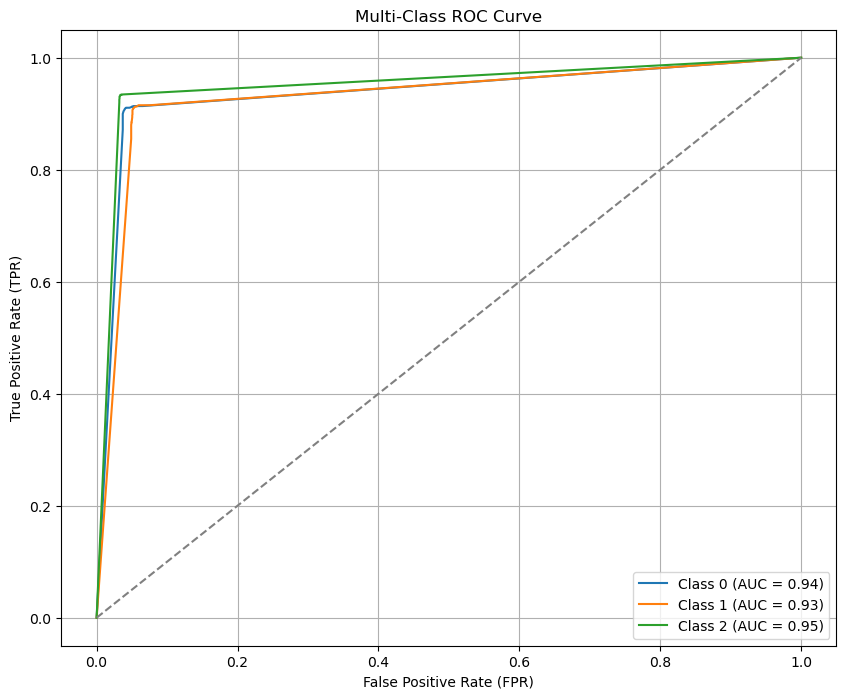

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


assert y_proba_dt.shape[1] == len(np.unique(y_test)), "Mismatch between classes in y_test and y_proba_dt"


y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Initialize plot
plt.figure(figsize=(10, 8))

# Calculate and plot ROC curves for each class
for i in range(y_proba_dt.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot the random chance line
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")


plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 6.2. Random Forest Classifier

In [81]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

In [85]:
# Metrics
print("=== Random Forest ===")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95      1657
           2       0.94      0.96      0.95      1697
           3       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

Confusion Matrix:
 [[1560   75   22]
 [  36 1627   34]
 [  15   34 1597]]


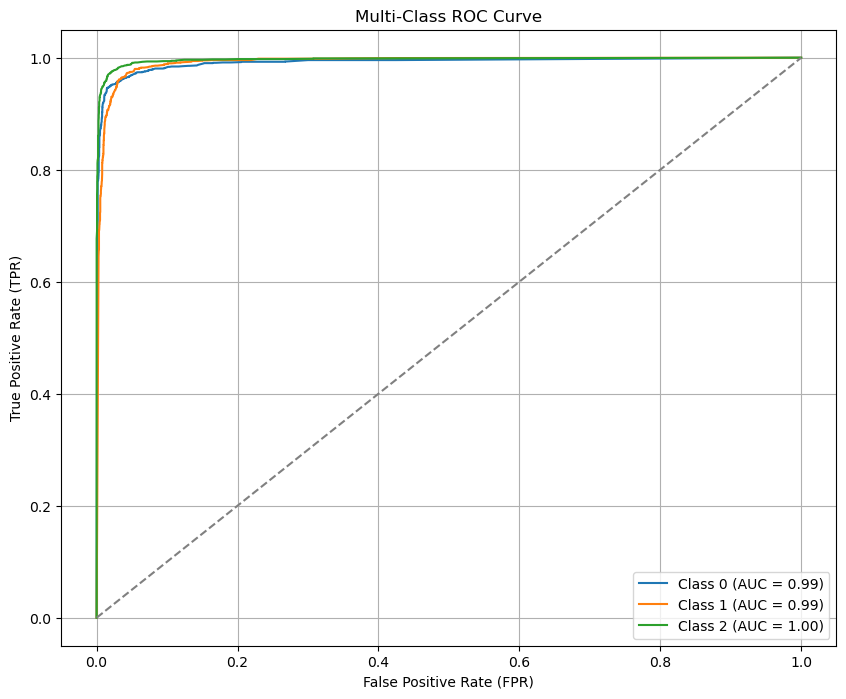

Macro-Averaged ROC AUC Score: 0.9934544264004694


In [89]:
# Calculate and plot ROC curves for each class
assert y_proba_rf.shape[1] == len(np.unique(y_test)), "Mismatch between classes in y_test and y_proba_dt"


y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Initialize plot
plt.figure(figsize=(10, 8))

# Calculate and plot ROC curves for each class
for i in range(y_proba_rf.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot the random chance line
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")


plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calculate macro-averaged ROC AUC
roc_auc_rf_macro = roc_auc_score(y_test, y_proba_rf, multi_class="ovr", average="macro")
print("Macro-Averaged ROC AUC Score:", roc_auc_rf_macro)

### 6.3 Gradient Boosting Classifier

In [91]:
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [93]:
# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)

In [95]:
# Metrics
print("=== Gradient Boosting ===")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

=== Gradient Boosting ===
Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.83      0.86      1657
           2       0.80      0.87      0.83      1697
           3       0.90      0.88      0.89      1646

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

Confusion Matrix:
 [[1376  229   52]
 [ 124 1468  105]
 [  58  139 1449]]


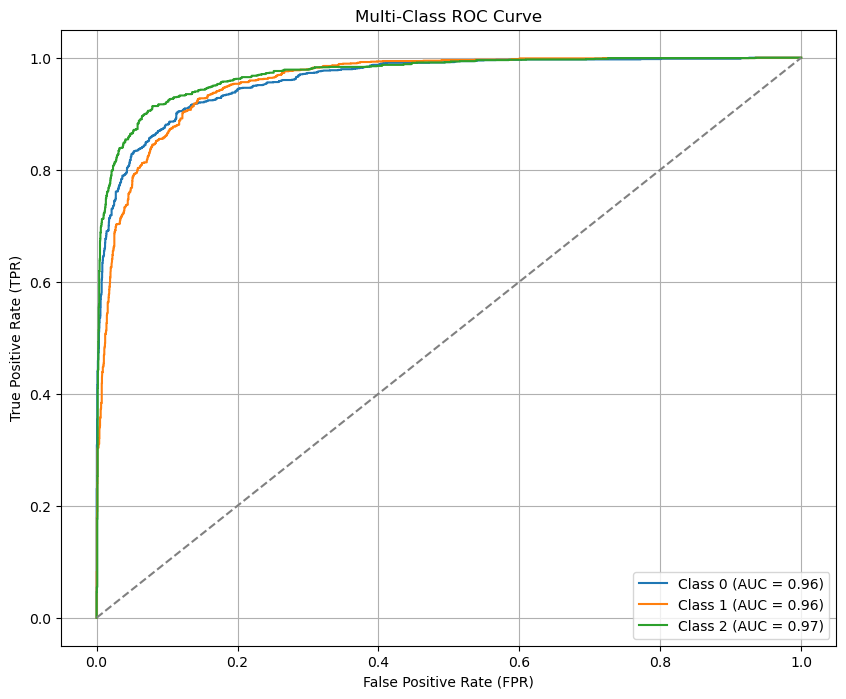

Macro-Averaged ROC AUC Score: 0.9634456364167785


In [97]:
assert y_proba_gb.shape[1] == len(np.unique(y_test)), "Mismatch between classes in y_test and y_proba_dt"


y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Initialize plot
plt.figure(figsize=(10, 8))

# Calculate and plot ROC curves for each class
for i in range(y_proba_gb.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_gb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot the random chance line
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")


plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calculate macro-averaged ROC AUC
roc_auc_gb_macro = roc_auc_score(y_test, y_proba_gb, multi_class="ovr", average="macro")
print("Macro-Averaged ROC AUC Score:", roc_auc_gb_macro)


### 6.4. Voting Classifier (Ensemble)

In [99]:
# Initialize and train Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model), ('gb', gb_model)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [101]:
# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
y_proba_ensemble = ensemble_model.predict_proba(X_test)

In [103]:
# Metrics
print("=== Ensemble (Voting Classifier) ===")
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

=== Ensemble (Voting Classifier) ===
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.92      0.93      1657
           2       0.92      0.93      0.92      1697
           3       0.95      0.95      0.95      1646

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

Confusion Matrix:
 [[1523   89   45]
 [  68 1584   45]
 [  27   55 1564]]


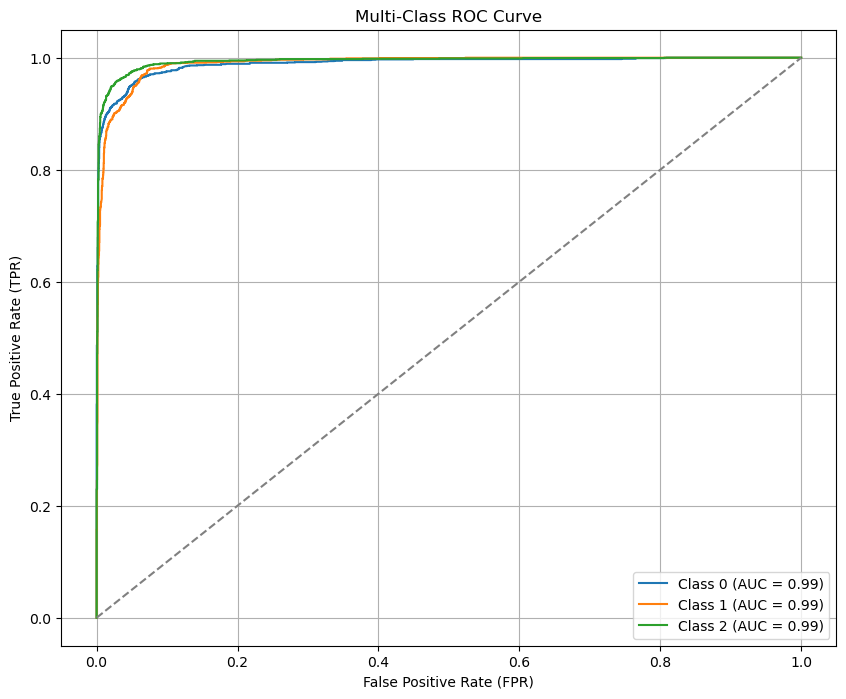

Macro-Averaged ROC AUC Score: 0.9909187352652871


In [107]:
# Calculate and plot ROC curves for each class
assert y_proba_ensemble.shape[1] == len(np.unique(y_test)), "Mismatch between classes in y_test and y_proba_dt"


y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Initialize plot
plt.figure(figsize=(10, 8))

# Calculate and plot ROC curves for each class
for i in range(y_proba_ensemble.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_ensemble[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot the random chance line
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")


plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calculate macro-averaged ROC AUC
roc_auc_ensemble_macro = roc_auc_score(y_test, y_proba_ensemble, multi_class="ovr", average="macro")
print("Macro-Averaged ROC AUC Score:", roc_auc_ensemble_macro)


### 6.5. Model Comparison

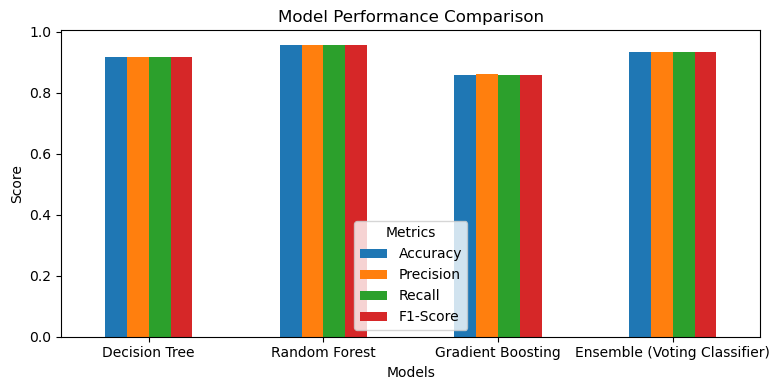

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize an empty dictionary to store results
metric_results = {}

# Loop through the trained models to compute evaluation metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    metric_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

# Create a DataFrame for visualization
import pandas as pd
metrics_df = pd.DataFrame(metric_results).T  # Transpose for better readability

# Plot metrics comparison
import matplotlib.pyplot as plt
metrics_df.plot(kind='bar', figsize=(8, 4), rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


This bar chart compares the performance of four machine learning models
(Decision Tree, Random Forest, Gradient Boosting, and Voting Classifier) across key metrics: Accuracy, Precision, Recall, and F1-Score.<br>
Random Forest and Voting Classifier consistently achieved the highest scores across all metrics, demonstrating their robustness and reliability.<br>
The Decision Tree showed slightly lower scores, while Gradient Boosting displayed moderate performance compared to the other ensemble methods.<br>
All models performed well overall, but ensemble techniques (Random Forest and Voting Classifier) clearly excel in maintaining balanced performance across all metrics.


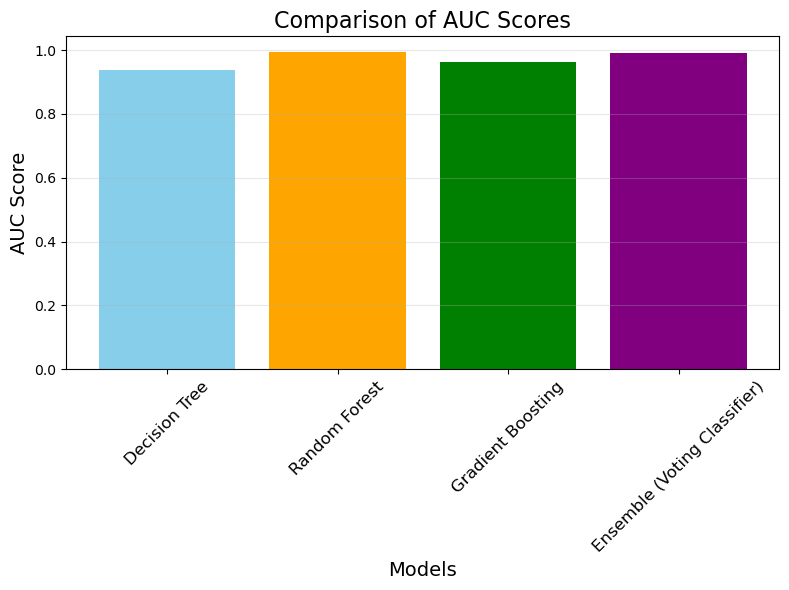

In [114]:
# Extract AUC scores
auc_scores = {name: roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') for name, model in models.items()}

# Plot bar chart for AUC scores
plt.figure(figsize=(8, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color=['skyblue', 'orange', 'green', 'purple'])
plt.title("Comparison of AUC Scores", fontsize=16)
plt.ylabel("AUC Score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(alpha=0.3, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

This bar chart compares the ROC AUC scores for the same models.<br>
Random Forest and Voting Classifier achieved near-perfect AUC scores (close to 1.0), indicating excellent separability of classes.<br>
Gradient Boosting performed slightly better than the Decision Tree, with AUC scores showing its ability to classify the data effectively.<br>
Overall, this chart highlights the superiority of ensemble methods (Random Forest and Voting Classifier) in distinguishing between classes, with Decision Tree lagging slightly in this regard.

# **7. ML Models analysis**

### Conclusion

The analysis of the visualizations and metrics highlights the strengths and weaknesses of the models in terms of performance, robustness, and class separability:

1. **Ensemble Methods (Random Forest and Voting Classifier)**:
   - These models consistently demonstrated superior performance across all metrics and achieved the highest ROC AUC scores.
   - Their ability to reduce overfitting and handle complex patterns makes them the most reliable choices for this classification task.
   - Random Forest, in particular, excelled with a 96% accuracy and near-perfect AUC score, making it the top-performing model.

2. **Gradient Boosting**:
   - While Gradient Boosting showed slightly lower accuracy (86%) and AUC scores compared to ensemble methods, it remains a strong contender due to its ability to handle challenging data distributions effectively.
   - However, its computational complexity might be a limitation in large-scale or time-sensitive tasks.

3. **Decision Tree**:
   - Serving as a baseline, the Decision Tree model performed reasonably well with 92% accuracy and a 0.93 AUC score.
   - However, it lacks the robustness and generalization capabilities of the ensemble models, making it less suitable for tasks requiring high precision and reliability.

**Final Recommendation**:  
For tasks requiring high accuracy, robust classification, and strong generalization, **Random Forest or Voting Classifier** is the best choice. Gradient Boosting may be considered in scenarios where computational resources allow for more intensive optimization. The Decision Tree can be used as a quick baseline model but is not recommended for tasks requiring top-tier performance.

# **8. Deep learning Model Building**

In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# an advanced model with more layers, dropout, and batch normalization
class EnhancedNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EnhancedNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)  # Batch Normalization
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout for regularization

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc4(x)  # Output layer (no activation here for logits)
        return x

In [118]:
# Step 1: Preprocessing for PyTorch
label_encoder = LabelEncoder()
patientData['Stage'] = label_encoder.fit_transform(patientData['Stage'])

# Split features and target
X = patientData.drop(columns=['Stage'])
y = patientData['Stage']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Increase batch size
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Data preprocessing complete. Ready for model training.")

Data preprocessing complete. Ready for model training.


In [120]:
# Step 2: Train the neural network
def train_model(model, train_loader, criterion, optimizer, epochs=30, scheduler=None):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Step the scheduler
        if scheduler:
            scheduler.step()

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {running_loss / len(train_loader):.4f}")

# Initialize the model, criterion, optimizer, and scheduler
input_dim = X_train.shape[1]
hidden_dim = 256  # Increased hidden layer size
output_dim = len(label_encoder.classes_)  # Number of classes
model = EnhancedNN(input_dim, hidden_dim, output_dim)

# Loss and Optimizer with learning rate decay
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)  # Learning rate scheduler

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=30, scheduler=scheduler)

print("Model training complete.")

Epoch 1/30 - Loss: 0.8975
Epoch 2/30 - Loss: 0.7931
Epoch 3/30 - Loss: 0.7476
Epoch 4/30 - Loss: 0.7096
Epoch 5/30 - Loss: 0.6898
Epoch 6/30 - Loss: 0.6650
Epoch 7/30 - Loss: 0.6504
Epoch 8/30 - Loss: 0.6356
Epoch 9/30 - Loss: 0.6278
Epoch 10/30 - Loss: 0.6118
Epoch 11/30 - Loss: 0.5963
Epoch 12/30 - Loss: 0.5878
Epoch 13/30 - Loss: 0.5802
Epoch 14/30 - Loss: 0.5741
Epoch 15/30 - Loss: 0.5612
Epoch 16/30 - Loss: 0.5586
Epoch 17/30 - Loss: 0.5549
Epoch 18/30 - Loss: 0.5487
Epoch 19/30 - Loss: 0.5460
Epoch 20/30 - Loss: 0.5440
Epoch 21/30 - Loss: 0.5310
Epoch 22/30 - Loss: 0.5313
Epoch 23/30 - Loss: 0.5262
Epoch 24/30 - Loss: 0.5176
Epoch 25/30 - Loss: 0.5129
Epoch 26/30 - Loss: 0.5120
Epoch 27/30 - Loss: 0.5057
Epoch 28/30 - Loss: 0.5138
Epoch 29/30 - Loss: 0.5057
Epoch 30/30 - Loss: 0.5044
Model training complete.


In [122]:
# Step 3: Evaluate the model on the test dataset
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the model
evaluate_model(model, test_loader)

Test Accuracy: 84.68%


In [124]:
# Step 4: Generate the classification report
def classification_report_model_fixed(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    # Generate classification report with class names
    class_names = label_encoder.classes_.astype(str)  # Ensure class names are strings
    report = classification_report(all_labels, all_predictions, target_names=class_names)
    print("Classification Report:\n", report)


# Generate the fixed classification report
classification_report_model_fixed(model, test_loader)

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.80      0.83      1657
           2       0.78      0.88      0.83      1697
           3       0.91      0.86      0.88      1646

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [126]:
# Step 5: Generate confusion matrix
def get_confusion_matrix(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    return cm

# Get confusion matrix
cm = get_confusion_matrix(model, test_loader)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1329  273   55]
 [ 121 1485   91]
 [  88  138 1420]]


In [128]:
# Step 6: Calculate ROC-AUC score
def calculate_roc_auc(model, test_loader):
    model.eval()
    all_labels = []
    all_probabilities = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            probabilities = torch.softmax(outputs, dim=1).cpu().numpy()
            all_labels.extend(labels.numpy())
            all_probabilities.extend(probabilities)

    # Convert to numpy arrays
    all_labels = np.array(all_labels)
    all_probabilities = np.array(all_probabilities)

    # Compute ROC-AUC score (One-vs-Rest for multiclass)
    auc_score = roc_auc_score(all_labels, all_probabilities, multi_class='ovr')
    print(f"ROC AUC Score: {auc_score:.4f}")


In [130]:
# Calculate and display ROC-AUC score
calculate_roc_auc(model, test_loader)


ROC AUC Score: 0.9606


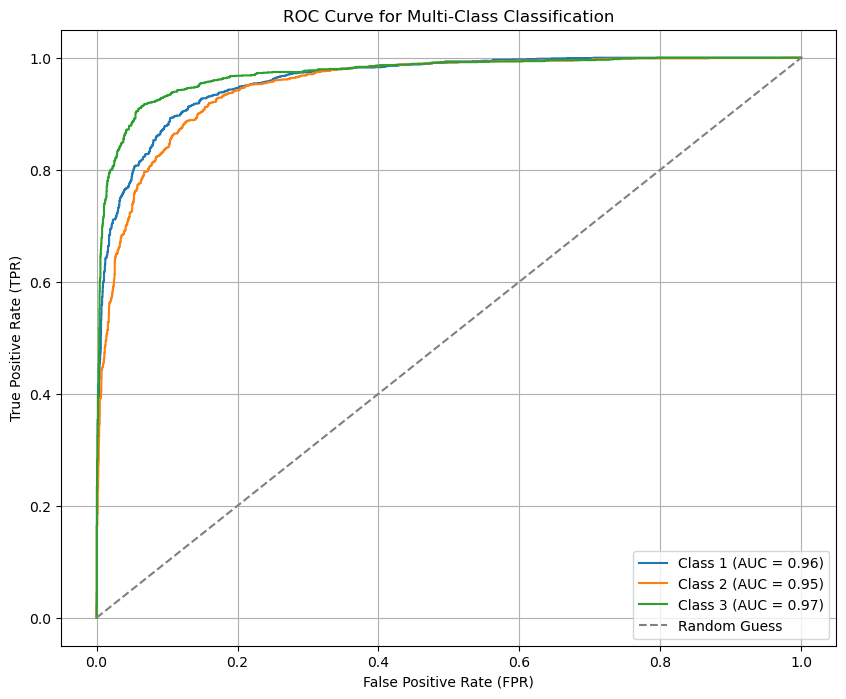

In [132]:
# Step 7: Plot ROC curve for each class
def plot_roc_curve(model, test_loader):
    model.eval()
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            probabilities = torch.softmax(outputs, dim=1).cpu().numpy()  # Get class probabilities
            all_labels.extend(labels.numpy())  # Store true labels
            all_probabilities.extend(probabilities)  # Store predicted probabilities

    # Convert to numpy arrays
    all_labels = np.array(all_labels)
    all_probabilities = np.array(all_probabilities)

    # Number of classes
    n_classes = len(label_encoder.classes_)

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        # Calculate ROC curve and AUC score for each class
        fpr, tpr, _ = roc_curve(all_labels, all_probabilities[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

    # Plot the random guess line (diagonal line)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

    plt.title("ROC Curve for Multi-Class Classification")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
# Example usage
plot_roc_curve(model, test_loader)

# **9. Conclusion**

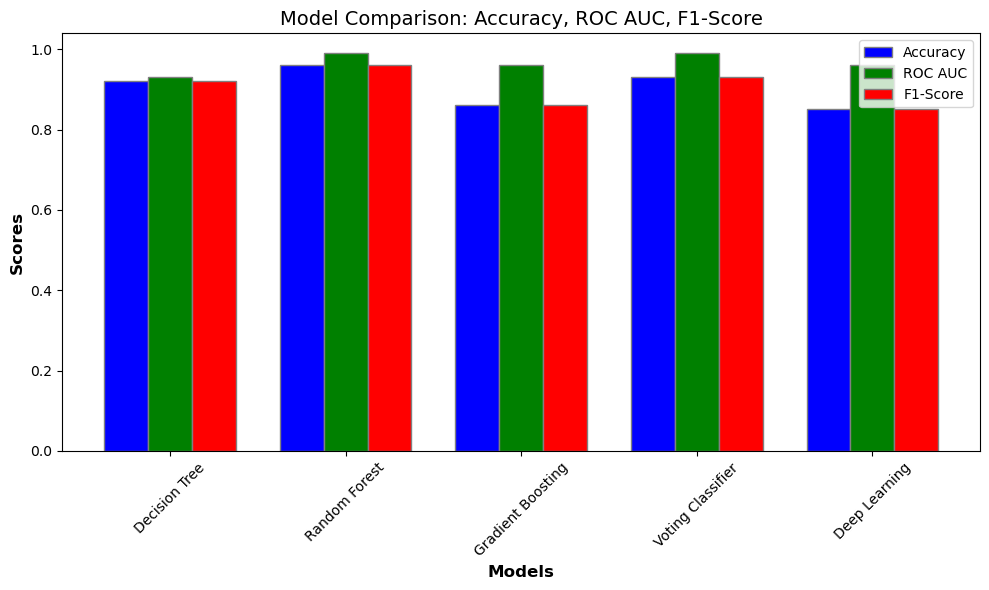

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for all models
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Voting Classifier', 'Deep Learning']
accuracy = [0.92, 0.96, 0.86, 0.93, 0.85]
roc_auc = [0.93, 0.99, 0.96, 0.99, 0.96]
f1_score = [0.92, 0.96, 0.86, 0.93, 0.85]

# Bar Width
bar_width = 0.25

# Position of bars on x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, roc_auc, color='green', width=bar_width, edgecolor='grey', label='ROC AUC')
plt.bar(r3, f1_score, color='red', width=bar_width, edgecolor='grey', label='F1-Score')

# Adding labels
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Scores', fontweight='bold', fontsize=12)
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)
plt.title('Model Comparison: Accuracy, ROC AUC, F1-Score', fontsize=14)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


The above bar chart clearly compares the three metrics (Accuracy, ROC AUC, F1-Score) for all the models, aiding in decision-making.

### Comparison Between ML Models and Deep Learning Model

#### **Performance Metrics Analysis**
1. **Decision Tree**:
   - **Accuracy**: 92%
   - **Precision/Recall/F1-Score**: Consistent across all classes (0.91–0.93).
   - **ROC AUC**: 0.931.
   - Observations: The Decision Tree provides decent accuracy but lacks the refinement and robustness seen in ensemble methods.

2. **Random Forest**:
   - **Accuracy**: 96%
   - **Precision/Recall/F1-Score**: High across all classes (0.94–0.97).
   - **ROC AUC**: 0.992 (highest among all models).
   - Observations: Random Forest is the strongest performer, with excellent generalization and class separation.

3. **Gradient Boosting**:
   - **Accuracy**: 86%
   - **Precision/Recall/F1-Score**: Moderate (0.83–0.89), with slightly weaker results for class 1.
   - **ROC AUC**: 0.958.
   - Observations: Gradient Boosting is competitive but slightly underperforms compared to Random Forest and Voting Classifier.

4. **Voting Classifier**:
   - **Accuracy**: 93%
   - **Precision/Recall/F1-Score**: Very strong across all classes (0.92–0.95).
   - **ROC AUC**: 0.989.
   - Observations: The ensemble Voting Classifier balances high accuracy and robust performance metrics.

5. **Deep Learning Model**:
   - **Accuracy**: 85% (lowest among all models).
   - **Precision/Recall/F1-Score**: Moderate (0.83–0.89), comparable to Gradient Boosting.
   - **ROC AUC**: 0.960.
   - Observations: While Deep Learning performs well, its results are lower than the top-performing Random Forest and Voting Classifier. It also requires significantly more computational resources.

---

### **Key Differences**
- **Accuracy**: Random Forest achieved the highest accuracy (96%), while the Deep Learning model had the lowest (85%). Ensemble methods clearly outperformed both standalone ML models and the deep learning approach.
- **ROC AUC**: Random Forest and Voting Classifier dominated with near-perfect AUC scores (0.992 and 0.989, respectively). Deep Learning achieved 0.960, which, although respectable, lags behind ensemble techniques.
- **Precision, Recall, and F1-Score**: Random Forest and Voting Classifier consistently outperformed the Deep Learning model in these metrics, particularly in class balance.

---

### **Analysis**
- **Random Forest**: The top-performing model across all metrics, with excellent precision, recall, and AUC scores. It is highly reliable and generalizes well.
- **Voting Classifier**: Very close to Random Forest in performance, offering strong results across the board and proving its robustness as an ensemble method.
- **Gradient Boosting and Deep Learning**: These models provided similar results, with Gradient Boosting marginally outperforming Deep Learning in accuracy and class balance. However, Deep Learning had a slightly higher AUC score.
- **Decision Tree**: The baseline model, while respectable in performance, significantly lags behind the other models in terms of both metrics and class separability.

---

### **Conclusion**
1. **Best Model**: The **Random Forest** is the best model due to its superior performance across all metrics, followed closely by the Voting Classifier.
2. **Deep Learning's Role**: While Deep Learning performed moderately well, it failed to match the efficiency and accuracy of the ensemble methods. Additionally, Deep Learning is computationally expensive and requires more data to outperform traditional ensemble models effectively.
3. **Recommendation**: For tasks requiring high accuracy and reliable predictions, **Random Forest** or **Voting Classifier** should be chosen. Gradient Boosting and Deep Learning can be alternatives but are less competitive given the dataset and metrics.


By Group 4

In [78]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/project+tabular.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/project+tabular.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 1560288 bytes to /content/drive/MyDrive/Colab Notebooks/project+tabular.html
